# Temporalis demonstration notebook

This notebook demonstrates the use of the [Brightway2 temporalis](http://brightway2-temporalis.readthedocs.org/en/latest/index.html) software. You should probably also know about the [Brightway2 LCA framework](http://brightwaylca.org/).

In [1]:
import bw2temporalis
print("Temporialis version:", bw2temporalis.__version__)
assert bw2temporalis.__version__ >= (0, 9), "Temporalis needs to be upgraded!"

Temporialis version: (0, 9)


In [2]:
from brightway2 import *
from bw2temporalis import *

In [3]:
projects.current = "temporalis demo"

In [4]:
if "biosphere3" not in databases:
    create_default_biosphere3()

## Creating a temporal inventory database

In [5]:
METHANE = ('biosphere3', '0795345f-c7ae-410c-ad25-1845784c75f5')  # Methane, fossil, air, kg
CO2 = ('biosphere3', '349b29d1-3e58-4c66-98b9-9d1a076efd2e')      # CO2, fossil, air, kg

In [6]:
data = {
    ('example', 'Functional Unit'): {
        'exchanges': [
            {
                'amount': 5,
                'input': ('example', 'EOL'),
                'temporal distribution': [
                    (0, 1),
                    (1, 1),
                    (2, 1),
                    (3, 1),
                    (4, 1)
                ],
                'type': 'technosphere'
            },
        ],
        'name': 'Functional Unit',
        'type': 'process'
    },
    ('example', 'EOL'): {
        'exchanges': [
            {
                'amount': 0.8,
                'input': ('example', 'Waste'),
                'type': 'technosphere'
            },
            {
                'amount': 0.2,
                'input': ('example', 'Landfill'),
                'type': 'technosphere'
            },
            {
                'amount': 1,
                'input': ('example', 'Use'),
                'type': 'technosphere'
            },
        ],
        'name': 'EOL',
        'type': 'process'
    },
    ('example', 'Use'): {
        'exchanges': [
            {
                'amount': 1,
                'input': ('example', 'Production'),
                'temporal distribution': [(-0.5, 1)],
                'type': 'technosphere'
            },
        ],
        'name': 'Use',
        'type': 'process'
    },
    ('example', 'Production'): {
        'exchanges': [
            {
                'amount': 1,
                'input': ('example', 'Transport'),
                'temporal distribution': [(-0.1, 1)],
                'type': 'technosphere'
            },
        ],
        'name': 'Production',
        'type': 'process'
    },
    ('example', 'Transport'): {
        'exchanges': [
            {
                'amount': 1,
                'input': ('example', 'Sawmill'),
                'type': 'technosphere'
            },
            {
                'amount': 0.1,
                'input': CO2,
                'type': 'biosphere'
            },
        ],
        'name': 'Production',
        'type': 'process'
    },
    ('example', 'Sawmill'): {
        'exchanges': [
            {
                'amount': 1.2,
                'input': ('example', 'Forest'),
                'temporal distribution': [(-0.5, 1.2)],
                'type': 'technosphere'
            },
            {
                'amount': 0.1,
                'input': CO2,
                'type': 'biosphere'
            },
        ],
        'name': 'Sawmill',
        'type': 'process'
    },
    ('example', 'Forest'): {
        'exchanges': [
            {
                'amount': -.2 * 6,
                'input': CO2,
                'temporal distribution': [(x, -.2) for x in (0, 5, 10, 15, 20, 30)],
                'type': 'biosphere'
            },
            {
                'amount': 1.5,
                'input': ('example', 'Thinning'),
                'temporal distribution': [
                    (5, .5),
                    (10, .5),
                    (15, .5),
                ],
                'type': 'technosphere'
            },
        ],
        'name': 'Forest',
        'type': 'process'
    },
    ('example', 'Thinning'): {
        'exchanges': [
            {
                'amount': 1,
                'input': ('example', 'Thinning'),
                'type': 'production'
            },
            {
                'amount': 1,
                'input': ('example', 'Avoided impact - thinnings'),
                'type': 'production'
            },
        ],
        'name': 'Thinning',
        'type': 'process'
    },
    ('example', 'Landfill'): {
        'exchanges': [
            {
                'amount': 0.1,
                'input': METHANE,
                'temporal distribution': [
                    (20, 0.025),
                    (30, 0.025),
                    (40, 0.025),
                    (50, 0.025)
                ],
                'type': 'biosphere'
            },
        ],
        'name': 'Landfill',
        'type': 'process'
    },
    ('example', 'Waste'): {
        'exchanges': [
            {
                'amount': 1,
                'input': ('example', 'Waste'),
                'type': 'production'
            },
            {
                'amount': 1,
                'input': ('example', 'Avoided impact - waste'),
                'type': 'production'
            },
        ],
        'name': 'Waste',
        'type': 'process'
    },
    ('example', 'Avoided impact - waste'): {
        'exchanges': [
            {
                'amount': -0.6,
                'input': CO2,
                'type': 'biosphere'
            },
            {
                'amount': 1,
                'input': ('example', 'Avoided impact - waste'),
                'type': 'production'
            },
        ],
        'name': 'Avoided impact - waste',
        'type': 'process'
    },
    ('example', 'Avoided impact - thinnings'): {
        'exchanges': [
            {
                'amount': -0.2,
                'input': CO2,
                'type': 'biosphere'
            },
            {
                'amount': 1,
                'input': ('example', 'Avoided impact - thinnings'),
                'type': 'production'
            },
        ],
        'name': 'Avoided impact - thinnings',
        'type': 'process'
    }
}

db = Database("example")
db.write(data)

Writing activities to SQLite3 database:
0%        100%
[############] | ETA[sec]: 0.000 
Total time elapsed: 0.006 sec


Title: Writing activities to SQLite3 database:
  Started: 11/08/2015 22:44:03
  Finished: 11/08/2015 22:44:03
  Total time elapsed: 0.006 sec
  CPU %: 114.000000
  Memory %: 1.237345


## Create static LCIA method

Note the units will be different from the dynamic method; this is watts/m2.

Values from 2013 assessment report.

In [7]:
if ('IPCC 2013 100',) not in methods:
    standard_ipcc = Method(('IPCC 2013 100',))
    standard_ipcc.register()
    standard_ipcc.write([
        [CO2, 1],
        [METHANE, 34]
    ])

## Create dynamic methods

Adapted from [co-fire library](https://github.com/gschivley/co-fire).

Units are degree Kelvin.

In [8]:
from bw2temporalis.cofire import create_temperature_method

if "GTP" not in dynamic_methods:
    create_temperature_method()

## Check static LCA scores

In [9]:
lca = LCA({('example', 'EOL'): 1}, ('IPCC 2013 100',))
lca.lci()
lca.lcia()
lca.score

0.27999995470046835

In [10]:
from bw2analyzer import ContributionAnalysis

ContributionAnalysis().annotated_top_processes(lca)

[(-1.4400001144409202, 1.2000000476837158, 'Forest'),
 (0.68000002026557937, 0.20000000298023224, 'Landfill'),
 (0.48000002622604399, -0.80000001192092896, 'Avoided impact - waste'),
 (0.36000001966953304, -1.800000071525574, 'Avoided impact - thinnings'),
 (0.10000000149011612, 1.0, 'Sawmill'),
 (0.10000000149011612, 1.0, 'Production'),
 (0.0, 0.80000001192092896, 'Waste'),
 (0.0, 1.0, 'EOL'),
 (0.0, 1.0, 'Production'),
 (0.0, 1.0, 'Use'),
 (0.0, 0.0, 'Functional Unit'),
 (0.0, 1.800000071525574, 'Thinning')]

In [11]:
ContributionAnalysis().annotated_top_emissions(lca)

[(0.68000002026557937, 0.020000000596046452, 'Methane, fossil'),
 (-0.40000006556511103, -0.40000006556511103, 'Carbon dioxide, fossil')]

## Dynamic LCA

In [12]:
%matplotlib inline

In [13]:
from matplotlib import pyplot as plt
import numpy as np

In [14]:
dlca = DynamicLCA({('example', 'EOL'): 1}, ("GTP", "worst case"))
timeline = dlca.calculate()

In [15]:
characterized = timeline.characterize_dynamic("GTP")

In [16]:
%matplotlib inline

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", palette="muted", color_codes=True)

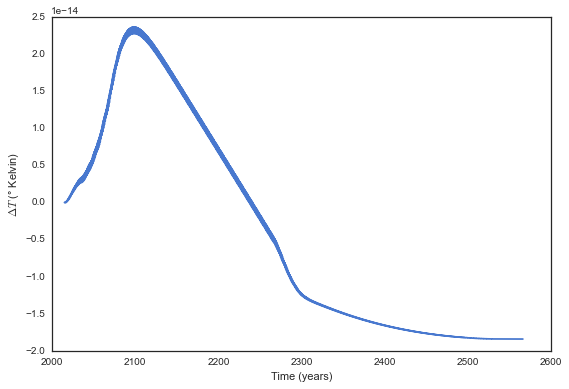

In [19]:
plt.plot(*characterized)
plt.xlabel("Time (years)")
plt.ylabel(r"$\Delta T$ (° Kelvin)")
plt.tight_layout()